In [1]:
from pandas import DataFrame, read_csv
from matplotlib.pyplot import figure, title, savefig, show
from seaborn import heatmap
from matplotlib.pyplot import figure, savefig, show
from libs.ds_charts import bar_chart, get_variable_types
import numpy as np
from pandas import read_csv, concat, unique, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import numpy as np
from pandas import DataFrame, read_csv, unique
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

ISTO E APLICADO ANTES DO TRAIN/ TEST SPLIT -> porque o test tem de ter as mesmas features do train!

In [8]:
filename = 'data/air_quality_dummified.csv'
data = read_csv(filename, na_values='?')
data.shape

(146109, 72)

In [9]:
THRESHOLD = 0.9

def select_redundant(corr_mtx, threshold: float) -> tuple[dict, DataFrame]:
    if corr_mtx.empty:
        return {}

    corr_mtx = abs(corr_mtx)
    vars_2drop = {}
    for el in corr_mtx.columns:
        el_corr = (corr_mtx[el]).loc[corr_mtx[el] >= threshold]
        if len(el_corr) == 1:
            corr_mtx.drop(labels=el, axis=1, inplace=True)
            corr_mtx.drop(labels=el, axis=0, inplace=True)
        else:
            vars_2drop[el] = el_corr.index
    return vars_2drop, corr_mtx

drop, corr_mtx = select_redundant(data.corr(), THRESHOLD)
print(drop.keys())

dict_keys(['FID', 'GbProv', 'CO_Max', 'CO_Std', 'PM2.5_Max', 'PM2.5_Std', 'PM10_Max', 'PM10_Std', 'SO2_Max', 'SO2_Std'])


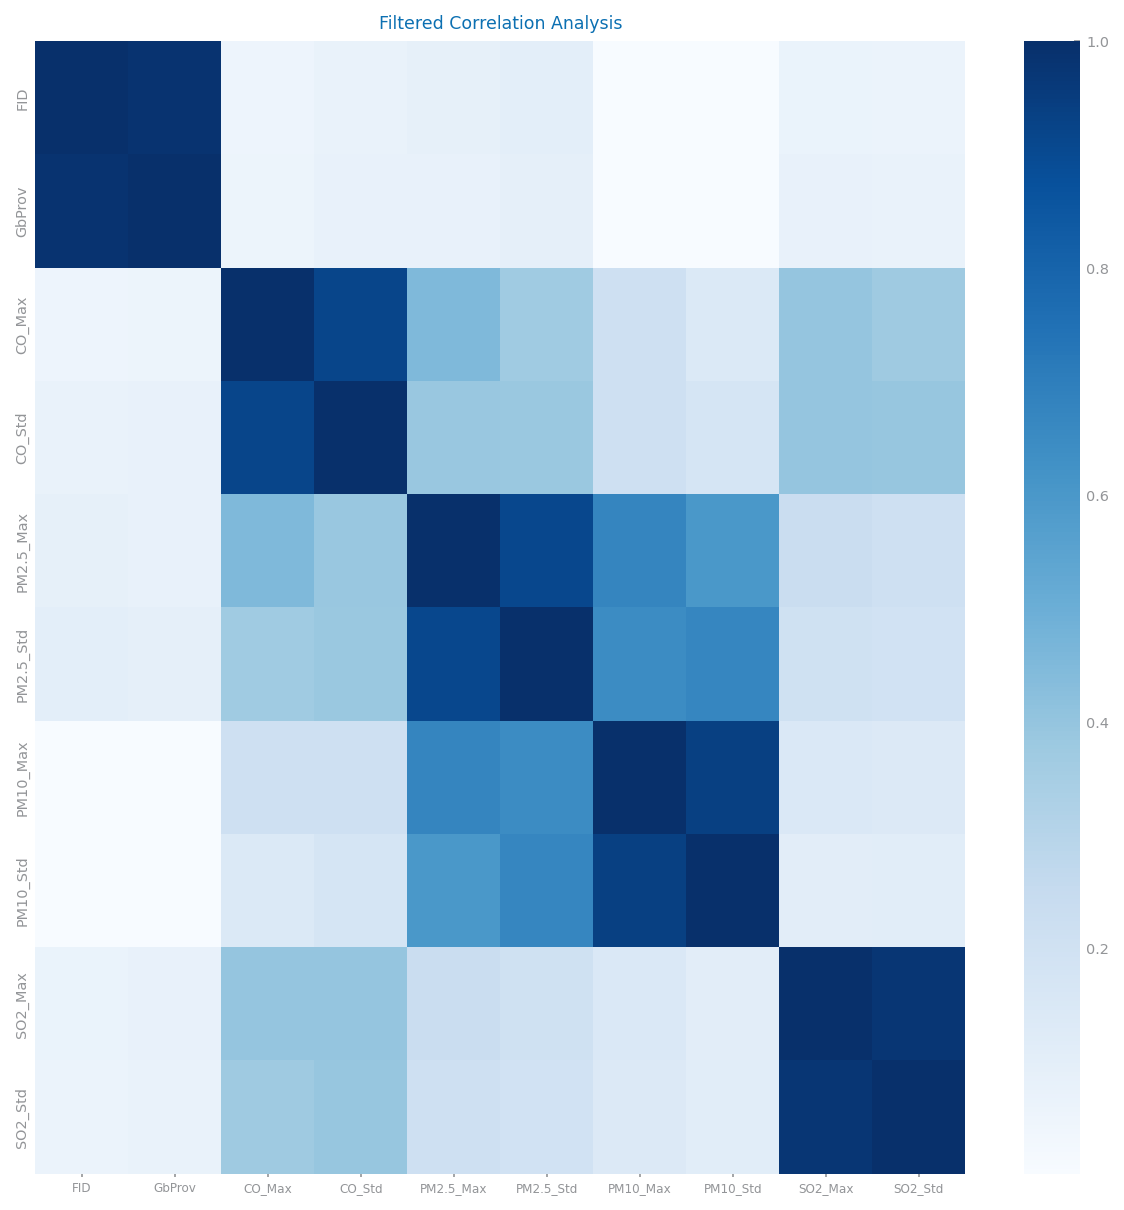

In [10]:
if corr_mtx.empty:
    raise ValueError('Matrix is empty.')

figure(figsize=[10, 10])
heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=False, cmap='Blues')
title('Filtered Correlation Analysis')
savefig(f'lab6_images/dataset_2/filtered_correlation_analysis_d2_{THRESHOLD}.png')
show()

In [6]:
def drop_redundant(data: DataFrame, vars_2drop: dict) -> DataFrame:
    sel_2drop = []
    print(vars_2drop.keys())
    for key in vars_2drop.keys():
        if key not in sel_2drop:
            for r in vars_2drop[key]:
                if r != key and r not in sel_2drop:
                    sel_2drop.append(r)
    print('Variables to drop', sel_2drop)
    df = data.copy()
    for var in sel_2drop:
        df.drop(labels=var, axis=1, inplace=True)
    return df
df = drop_redundant(data, drop)
df

dict_keys(['CO_Max', 'CO_Std', 'PM2.5_Max', 'PM2.5_Std', 'PM10_Max', 'PM10_Std', 'SO2_Max', 'SO2_Std'])
Variables to drop ['CO_Std', 'PM2.5_Std', 'PM10_Std', 'SO2_Std']


,Field_1,CO_Mean,CO_Min,CO_Max,NO2_Mean,NO2_Min,NO2_Max,NO2_Std,O3_Mean,O3_Min,...,date_3,date_4,date_5,date_6,date_7,date_8,date_9,date_10,date_11,date_12
0,-1.492277,0.123830,0.300057,-0.039718,1.589621,2.375005,0.749699,-0.248256,-1.849076,-1.075989,...,False,False,False,False,False,False,False,False,False,False
1,0.763073,1.132131,0.747808,0.486645,3.218767,5.260892,1.858168,-0.079297,-1.858524,-1.027533,...,False,False,False,False,False,False,False,False,False,False
2,0.589585,2.051601,2.620222,1.169494,2.606072,4.024083,1.517101,0.030418,-1.793961,-0.979076,...,False,False,False,False,False,False,False,False,False,False
3,0.752868,3.139505,2.335290,4.413027,2.995712,4.848622,1.943435,0.132461,-1.816007,-0.930620,...,False,False,False,False,False,False,False,False,False,False
4,0.314044,1.775875,1.032741,1.454014,1.310097,1.035130,0.920233,0.731922,-1.398712,-0.930620,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146096,-0.359499,0.951006,-0.921082,2.008829,0.711520,-0.923150,0.962866,2.186124,-0.732614,-1.075989,...,True,False,False,False,False,False,False,False,False,False
146097,-0.818733,0.529919,0.503581,0.614679,0.584464,-0.820083,1.346567,2.220095,-0.220837,-0.736794,...,True,False,False,False,False,False,False,False,False,False
146098,1.314154,-0.320330,0.015125,0.259028,-0.762334,-0.717016,0.408631,0.239941,0.952314,0.619984,...,True,False,False,False,False,False,False,False,False,False
146099,0.701842,-1.287100,-1.735175,-0.736794,-1.191502,-0.923150,-1.296706,-1.008143,0.703512,1.831394,...,True,False,False,False,False,False,False,False,False,False


25 ['FID', 'GbProv', 'Field_1', 'CO_Mean', 'CO_Max', 'NO2_Mean', 'NO2_Min', 'NO2_Max', 'NO2_Std', 'O3_Mean', 'O3_Min', 'O3_Max', 'O3_Std', 'PM2.5_Mean', 'PM2.5_Min', 'PM2.5_Max', 'PM2.5_Std', 'PM10_Mean', 'PM10_Min', 'PM10_Max', 'PM10_Std', 'SO2_Mean', 'SO2_Min', 'SO2_Max', 'SO2_Std']
['FID', 'GbProv', 'Field_1', 'CO_Mean', 'CO_Max', 'NO2_Mean', 'NO2_Min', 'NO2_Max', 'NO2_Std', 'O3_Mean', 'O3_Min', 'O3_Max', 'O3_Std', 'PM2.5_Mean', 'PM2.5_Min', 'PM2.5_Max', 'PM2.5_Std', 'PM10_Mean', 'PM10_Min', 'PM10_Max', 'PM10_Std', 'SO2_Mean', 'SO2_Min', 'SO2_Max', 'SO2_Std']


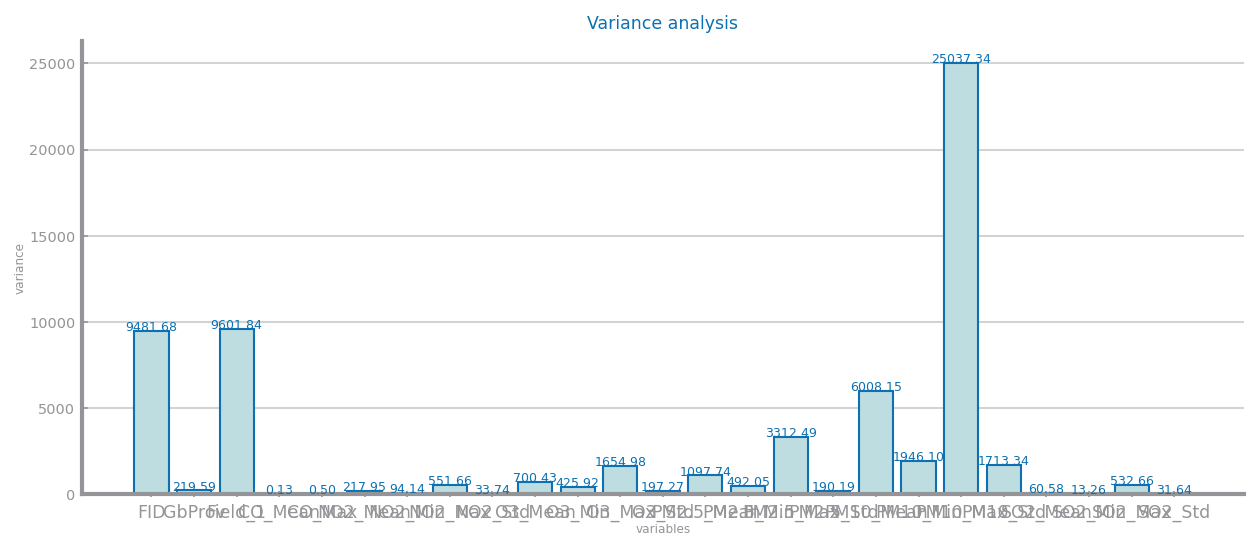

In [11]:
def select_low_variance(data: DataFrame, threshold: float) -> list:
    lst_variables = []
    lst_variances = []
    for el in data.columns:
        value = data[el].var()
        if value >= threshold:
            lst_variables.append(el)
            lst_variances.append(value)

    print(len(lst_variables), lst_variables)
    figure(figsize=[10, 4])
    bar_chart(lst_variables, lst_variances, title='Variance analysis', xlabel='variables', ylabel='variance')
    savefig('lab6_images/dataset_2/filtered_variance_analysis_ds2.png')
    return lst_variables

numeric = get_variable_types(data)['Numeric']
vars_2drop = select_low_variance(data[numeric], 0.1)
print(vars_2drop)

### Train Test Split with feature selection

In [12]:
target = 'ALARM'
positive = 'Injured'
negative = 'Danger'
values = {'Original': [len(df[df[target] == positive]), len(df[df[target] == negative])]}

y: np.ndarray = df.pop(target).values
X: np.ndarray = df.values
labels: np.ndarray = unique(y)
labels.sort()

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train_new = concat([DataFrame(trnX, columns=df.columns), DataFrame(trnY,columns=[target])], axis=1)

test_new = concat([DataFrame(tstX, columns=df.columns), DataFrame(tstY,columns=[target])], axis=1)


### Naive Bayes Impact


In [13]:
target = 'ALARM'
trnY_new: np.ndarray = train_new.pop(target).values
trnX_new: np.ndarray = train_new.values
labels = unique(trnY_new)
labels.sort()

tstY_new: np.ndarray = test_new.pop(target).values
tstX_new: np.ndarray = test_new.values

clf = BernoulliNB()
clf.fit(trnX_new, trnY_new)
prd_trn = clf.predict(trnX_new)
prd_tst = clf.predict(tstX_new)
print(f1_score(tstY_new, prd_tst, pos_label='Danger'))
with_feature_selection = f1_score(tstY_new, prd_tst, pos_label='Danger')


0.572736097628623


In [15]:
train_old = read_csv(f'data/air_quality_scaled_zscore_train.csv')
test_old = read_csv(f'data/air_quality_scaled_zscore_test.csv')
#PREPARE TRAIN AND TEST SZCORE
target = 'ALARM'
trnY_old: np.ndarray = train_old.pop(target).values
trnX_old: np.ndarray = train_old.values
labels = unique(trnY_old)
labels.sort()

tstY_old: np.ndarray = test_old.pop(target).values
tstX_old: np.ndarray = test_old.values

clf = BernoulliNB()
clf.fit(trnX_old, trnY_old)
prd_trn = clf.predict(trnX_old)
prd_tst = clf.predict(tstX_old)
print(f1_score(tstY_old, prd_tst, pos_label='Danger'))
without_feature_selection = f1_score(tstY_old, prd_tst, pos_label='Danger')

0.5778549114890663


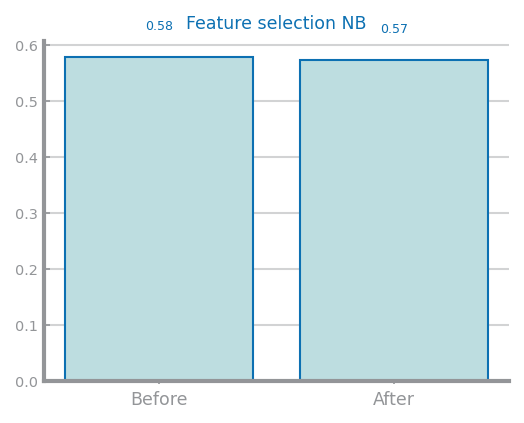

<Figure size 600x450 with 0 Axes>

In [16]:
bar_chart(xvalues=['Before','After'],yvalues=[without_feature_selection,with_feature_selection],title="Feature selection NB")
show()
savefig('lab6_images/dataset_2/nb_before_after_ds2.png')

### KNN Impact

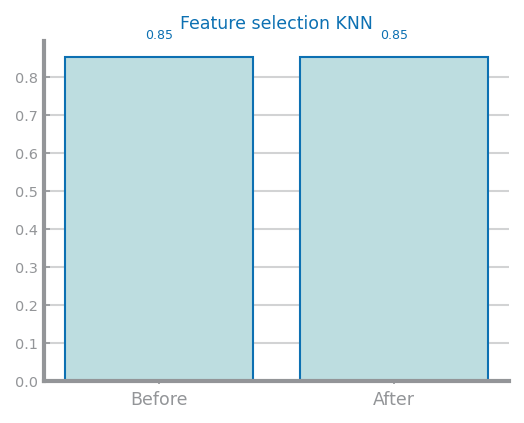

In [17]:
from sklearn.neighbors import KNeighborsClassifier
#BEFORE
clf = knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
clf.fit(trnX_old, trnY_old)
prd_trn = clf.predict(trnX_old)
prd_tst = clf.predict(tstX_old)
knn_old = f1_score(tstY_old, prd_tst, pos_label='Danger')

#AFTER
clf = knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
clf.fit(trnX_new, trnY_new)
prd_trn = clf.predict(trnX_new)
prd_tst = clf.predict(tstX_new)
knn_new = f1_score(tstY_new, prd_tst, pos_label='Danger')

bar_chart(xvalues=['Before','After'],yvalues=[knn_old,knn_new],title="Feature selection KNN")
savefig('lab6_images/dataset_2/knn_before_after_ds2.png')
show()

### Random Forests Impact

/Users/goncalofalcao/Desktop/IST/CD/ProjetoCD/dogit/projetoCD/libs/ds_charts.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xvalues, fontsize='small', ha='center')


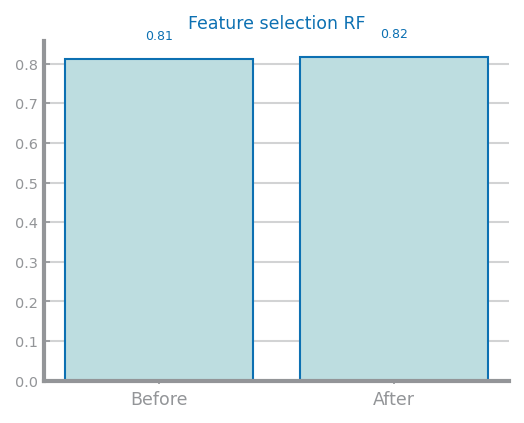

In [ ]:
#BEFORE
clf = RandomForestClassifier(n_estimators=125,max_depth=5,max_features=0.9)
clf.fit(trnX_old, trnY_old)
prd_trn = clf.predict(trnX_old)
prd_tst = clf.predict(tstX_old)
rf_old = f1_score(tstY_old, prd_tst, pos_label='Danger')

#AFTER
clf = RandomForestClassifier(n_estimators=125,max_depth=5,max_features=0.9)
clf.fit(trnX_new, trnY_new)
prd_trn = clf.predict(trnX_new)
prd_tst = clf.predict(tstX_new)
rf_new = f1_score(tstY_new, prd_tst, pos_label='Danger')

bar_chart(xvalues=['Before','After'],yvalues=[rf_old,rf_new],title="Feature selection RF")
savefig('lab6_images/dataset_2/rf_before_after_ds2.png')
show()
